# Домашнее задание 2.

Продолжаем знакомиться с библиотекой `tensorflow`.

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

## Задание 1 -- tensorflow vs numpy (3 балла).

Сравните скорость работы функций над массивами в фреймворках tensorflow и numpy. Для этого реализуйте на нампае и тф'е следующее:

 * Сумму квадратов диагональных элементов квадратной матрицы. Например для матрицы
$$
 \begin{pmatrix}
     1& 0& 5\\
     -2& 8& 12\\
     4& 1& -5
 \end{pmatrix}
$$
 такая сумма будет равна $1^2 + 8^2 + (-5)^2 = 90$.
 * Угол между векторами в n-мерном пространстве. Напомним, что он вычисляется по формуле
 $$
     \arccos \cfrac{\left\langle x, y\right\rangle}{||x||\cdot ||y||}
 $$

 * Сумму элементов коммутатора квадратных матриц $A$ и $B$. Коммутатор матриц это матрица $C = AB - BA$.
 
Постройте графики зависимости времени выполнения операций от размера массивов (в логарифмическй шкале) для каждой задачи для tensorflow и numpy (три рисунка, по два графика на рисунок). Элементы матриц выбирайте случайным образом (через модуль tf.random и np.random соотвтетственно). Какой фреймворк оказывается быстрее? Как Вы думаете, почему?

Можете пользоваться образцом кода ниже.

**Замечание**. Графики должны быть опрятными! Подписывайте оси и единицы измерения, указывайте легенду. За неопрятные графики оценка за задание может быть снижена.

**Подсказка**. Функция time.time() возвращает время в секундах (с высокой точностью), прошедшее от 00:00 1 января 1970 года. Используйте её, чтобы посчитать, сколько длилось выполнение куска кода. Также вам могут пригодиться функции `tf.linalg.norm`, `tf.diag_part`, `tf.acos`, `tf.matmul`

### Сумма квадратов диагональных элементов

#### case 1

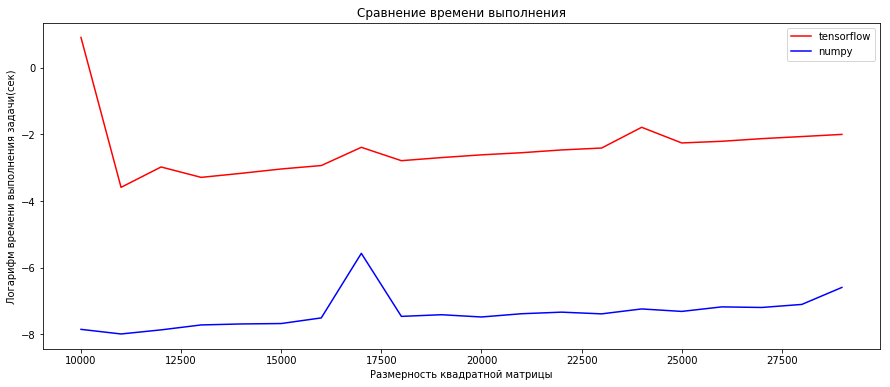

In [0]:
size_of_matrix = range(10000, 30000, 1000)

# tensorflow
sess = tf.Session()

tf_time = []

for n in size_of_matrix:
    
    x = tf.random.uniform((n, n), - 10, 10)
    y = tf.reduce_sum(tf.diag_part(x) ** 2)
    
    begin = time.time()
    sess.run(y)
    end = time.time()
    time_spent = end - begin
    tf_time.append(np.log(time_spent))

sess.close()

# numpy
np_time = []

for n in size_of_matrix:
    
    x = np.random.uniform(-10, 10, (n, n))
    begin = time.time()
    y = np.sum(np.diagonal(x) ** 2)
    end = time.time()
    time_spent = end - begin
    np_time.append(np.log(time_spent))


# plot results
plt.figure(figsize=(15,6))
plt.plot(size_of_matrix, tf_time, color = 'red', label = 'tensorflow')
plt.plot(size_of_matrix, np_time, color = 'blue', label = 'numpy')
plt.title('Сравнение времени выполнения')
plt.ylabel('Логарифм времени выполнения задачи(сек)')
plt.xlabel('Размерность квадратной матрицы')
plt.legend()

В этом кейсе numpy показывает лучший результат, но проблема в том, что в tensorflow к времени выполнения основной задачи прибавляется время работы функции `x = tf.random.uniform((n, n), - 10, 10)`. Попробуем это изменить в следующем кейсе. 

#### case 2

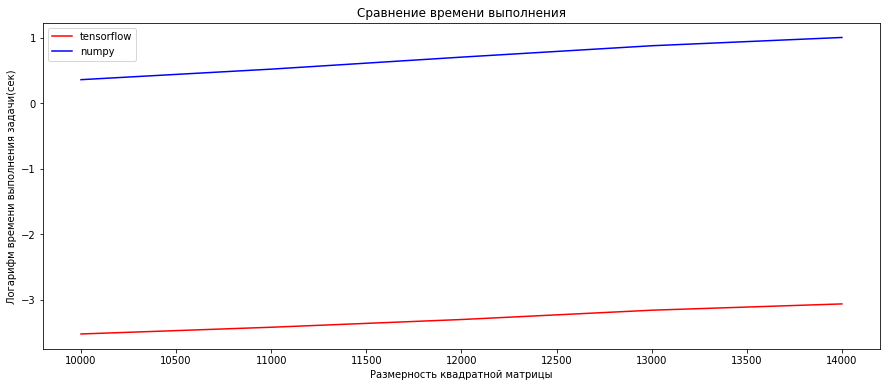

In [0]:
size_of_matrix = range(10000, 15000, 1000)

# tensorflow
sess = tf.Session()

tf_time = []

for n in size_of_matrix:
    
    x = tf.random.uniform((n, n), - 10, 10)
    y = tf.reduce_sum(tf.diag_part(x) ** 2)
    
    begin = time.time()
    sess.run(y)
    end = time.time()
    time_spent = end - begin
    tf_time.append(np.log(time_spent))

sess.close()

# numpy
np_time = []

for n in size_of_matrix:
    
    begin = time.time()
    x = np.random.uniform(-10, 10, (n, n))
    y = np.sum(np.diagonal(x) ** 2)
    end = time.time()
    time_spent = end - begin
    np_time.append(np.log(time_spent))


# plot results
plt.figure(figsize=(15,6))
plt.plot(size_of_matrix, tf_time, color = 'red', label = 'tensorflow')
plt.plot(size_of_matrix, np_time, color = 'blue', label = 'numpy')
plt.title('Сравнение времени выполнения')
plt.ylabel('Логарифм времени выполнения задачи(сек)')
plt.xlabel('Размерность квадратной матрицы')
plt.legend()

В данном случае tensorflow является абсолютным победителем

#### case 3

Здесь мы попробуем скормить тензору np.array и посмотрим, изменится ли время выполнения основной задачи

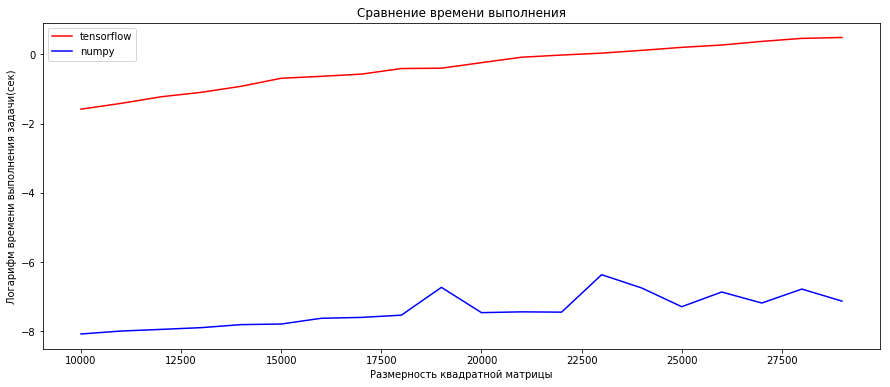

In [0]:
size_of_matrix = range(10000, 30000, 1000)

# tensorflow
sess = tf.Session()

tf_time = []

for n in size_of_matrix:
    
    new_input = np.random.uniform(- 10, 10, (n, n))

    x = tf.placeholder("float32", (n, n))
    y = tf.reduce_sum(tf.diag_part(x) ** 2)
    
    begin = time.time()
    sess.run(y, {x: new_input})
    end = time.time()
    time_spent = end - begin
    tf_time.append(np.log(time_spent))

sess.close()

# numpy
np_time = []

for n in size_of_matrix:
    
    x = np.random.uniform(-10, 10, (n, n))
    begin = time.time()
    y = np.sum(np.diagonal(x) ** 2)
    end = time.time()
    time_spent = end - begin
    np_time.append(np.log(time_spent))


# plot results
plt.figure(figsize=(15,6))
plt.plot(size_of_matrix, tf_time, color = 'red', label = 'tensorflow')
plt.plot(size_of_matrix, np_time, color = 'blue', label = 'numpy')
plt.title('Сравнение времени выполнения')
plt.ylabel('Логарифм времени выполнения задачи(сек)')
plt.xlabel('Размерность квадратной матрицы')
plt.legend()

С инпутом в виде `np.array` tensorflow работает еще хуже(((((( Будем использовать второй кейс для дальнейших заданий

### Угол между векторами

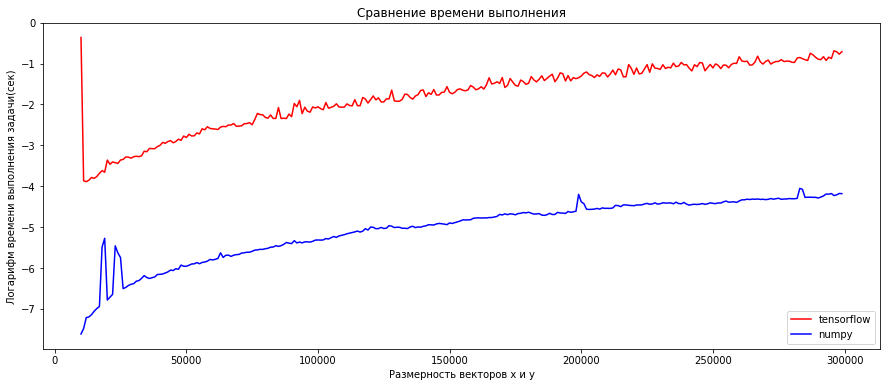

In [0]:
array_size = range(10000, 300000, 1000)

# tensorflow
sess = tf.Session()

tf_time = []

for n in array_size:

    x = tf.random.uniform((1, n), -10, 10)
    y = tf.random.uniform((n, 1), -10, 10)
    z = tf.tensordot(x, y, 1) / (tf.linalg.norm(x) * tf.linalg.norm(y))

    begin = time.time()
    sess.run(z)
    end = time.time()
    time_spent = end - begin
    tf_time.append(np.log(time_spent))

# numpy
np_time = []

for n in array_size:

    begin = time.time()
    x = np.random.uniform(-10, 10, (n))
    y = np.random.uniform(-10, 10, (n))
    z = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
    end = time.time()
    time_spent = end - begin
    np_time.append(np.log(time_spent))

# plot results
plt.figure(figsize=(15,6))
plt.plot(array_size, tf_time, color = 'red', label = 'tensorflow')
plt.plot(array_size, np_time, color = 'blue', label = 'numpy')
plt.title('Сравнение времени выполнения')
plt.ylabel('Логарифм времени выполнения задачи(сек)')
plt.xlabel('Размерность векторов x и y')
plt.legend()

В этом задании numpy показал себя лучше, хотя с матрицами ситуация была обратной

###Cумма элементов коммутатора

10000
12000
14000
16000


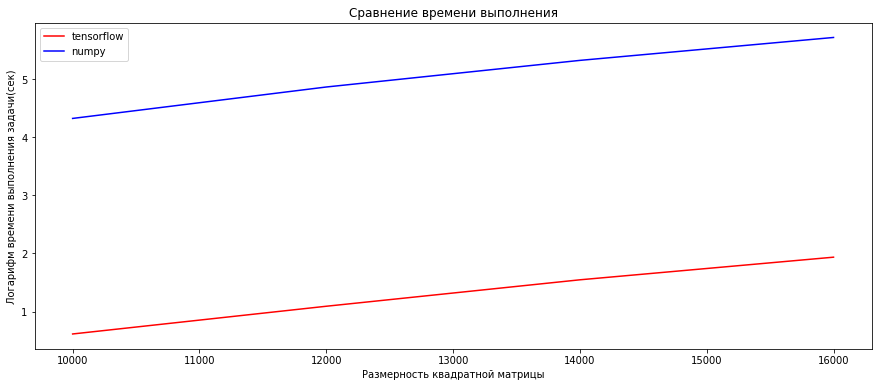

In [0]:
size_of_matrix = range(10000, 18000, 2000) # недостаточно памяти RAM для бо'льших размеров

# tensorflow
sess = tf.Session()

tf_time = []

for n in size_of_matrix:
    
    x = tf.random.uniform((n, n), - 10, 10)
    y = tf.random.uniform((n, n), - 10, 10)
    z = tf.reduce_sum(x @ y - y @ x) 
    
    begin = time.time()
    sess.run(z)
    end = time.time()
    time_spent = end - begin
    tf_time.append(np.log(time_spent))
    print(n)

sess.close()

# numpy
np_time = []

for n in size_of_matrix:
    
    begin = time.time()
    x = np.random.uniform(-10, 10, (n, n))
    y = np.random.uniform(-10, 10, (n, n))
    z = np.sum(x @ y - y @ x)
    end = time.time()
    time_spent = end - begin
    np_time.append(np.log(time_spent))

# plot results
plt.figure(figsize=(15,6))
plt.plot(size_of_matrix, tf_time, color = 'red', label = 'tensorflow')
plt.plot(size_of_matrix, np_time, color = 'blue', label = 'numpy')
plt.title('Сравнение времени выполнения')
plt.ylabel('Логарифм времени выполнения задачи(сек)')
plt.xlabel('Размерность квадратной матрицы')
plt.legend()

Даже при маленькой выборке понятно, что tensorflow работает намного быстрей. 

Окончательный вывод: на матрицах больших размеров tensorflow выполняет операции намного быстрей, в то время как numpy показывает лучшие результаты при работе с векторами. 

## Задание 2 -- градиенты и оптимайзеры (3 балла).

Продолжим работать с датасетом MNIST с размером картинок 8х8.

In [0]:
from sklearn.datasets import load_digits

mnist = load_digits()

X, y = mnist.data, mnist.target

n_labels = len(np.unique(y))

Многие алгоритмы оптимизации имплементированы в `tensorflow`. В этом задании мы сравним их при одинаковых параметрах, а также переберём разные параметры для одного алгоритма.

### **Задание 2.1** (1.5 балла). 
Исследуйте вклад параметра momentum в методу `tf.train.MomentumOptimizer`. Для этого для разных значений momentum постройте графики значения функции потерь от номера итерации. При каких значениях momentum алгоритм сходится быстрее? Используйте `learning_rate=0.01`.

**Замечание**. В этом задании используется многоклассовая логистическая регрессия. Не меняйте код модели в ячейке ниже.

In [50]:
tf.reset_default_graph()

w = tf.Variable(np.ones((X.shape[1], n_labels)), dtype="float32")
X_input = tf.placeholder("float32", (None, X.shape[1]))
y_input = tf.placeholder("int32", (None,))

predicted = tf.nn.softmax(X_input @ w)
loss = tf.losses.log_loss(tf.one_hot(y_input, depth=n_labels), predicted)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
def train(X, y, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X) // batch_size
        for epoch in range(1):
            loss_history = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history.append(loss_)
    return loss_history

momentum = 0.001, loss = 0.10438671
momentum = 0.01, loss = 0.10411616
momentum = 0.1, loss = 0.10143914
momentum = 0.2, loss = 0.09862057
momentum = 0.3, loss = 0.09615381
momentum = 0.5, loss = 0.0929867
momentum = 0.7, loss = 0.08927622
momentum = 0.75, loss = 0.088305235
momentum = 0.8, loss = 0.08640214
momentum = 0.85, loss = 0.06592098
momentum = 0.9, loss = 0.07608022
momentum = 0.95, loss = 0.15520558


Text(0.5, 0, 'number of iterations')

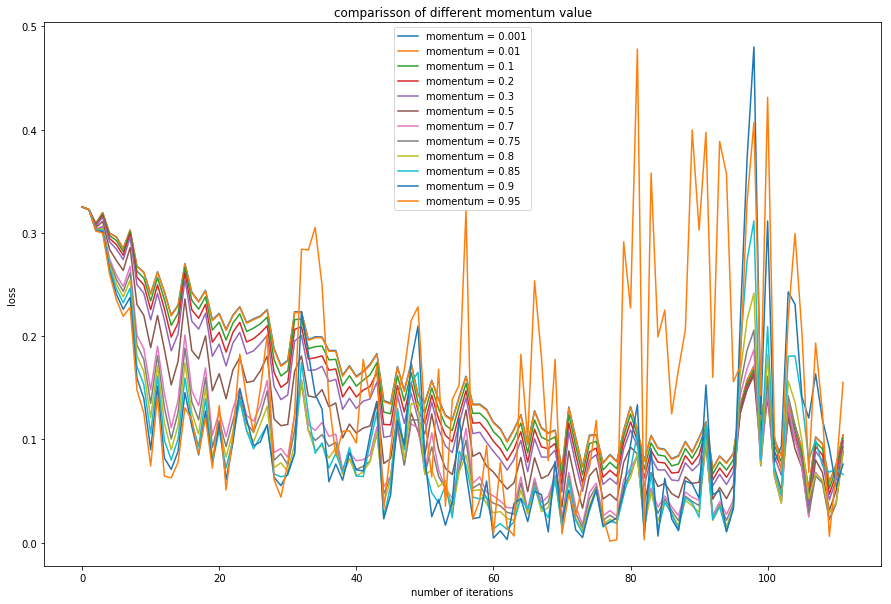

In [52]:
l = [0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
plt.figure(figsize=(15,10))
for kek in l:
    plt.plot(train(X, y, tf.train.MomentumOptimizer(0.01, kek).minimize(loss)), label = 'momentum = ' + str(kek))
    print('momentum = ' + str(kek) + ', loss = ' + str(train(X, y, tf.train.MomentumOptimizer(0.01, kek).minimize(loss))[-1]))
plt.legend()
plt.title('comparisson of different momentum value')
plt.ylabel('loss')
plt.xlabel('number of iterations')

Сократим выборку, убрав очень большое значение(0.95, т.к. график сильно расходится) и маленькие(т.к. у них loss в полтора раза больше). Рассмотрим интервал [ 0.75 : 0.9 )

momentum = 0.75, loss = 0.088305235
momentum = 0.76, loss = 0.088219315
momentum = 0.77, loss = 0.08812016
momentum = 0.78, loss = 0.08791651
momentum = 0.79, loss = 0.08743973
momentum = 0.8, loss = 0.08640214
momentum = 0.81, loss = 0.08443425
momentum = 0.8200000000000001, loss = 0.08130643
momentum = 0.8300000000000001, loss = 0.07718434
momentum = 0.8400000000000001, loss = 0.07228925
momentum = 0.8500000000000001, loss = 0.06592098
momentum = 0.8600000000000001, loss = 0.05759067
momentum = 0.8700000000000001, loss = 0.050130844
momentum = 0.8800000000000001, loss = 0.050111614
momentum = 0.8900000000000001, loss = 0.062699616
momentum = 0.9000000000000001, loss = 0.07608022


Text(0.5, 0, 'number of iterations')

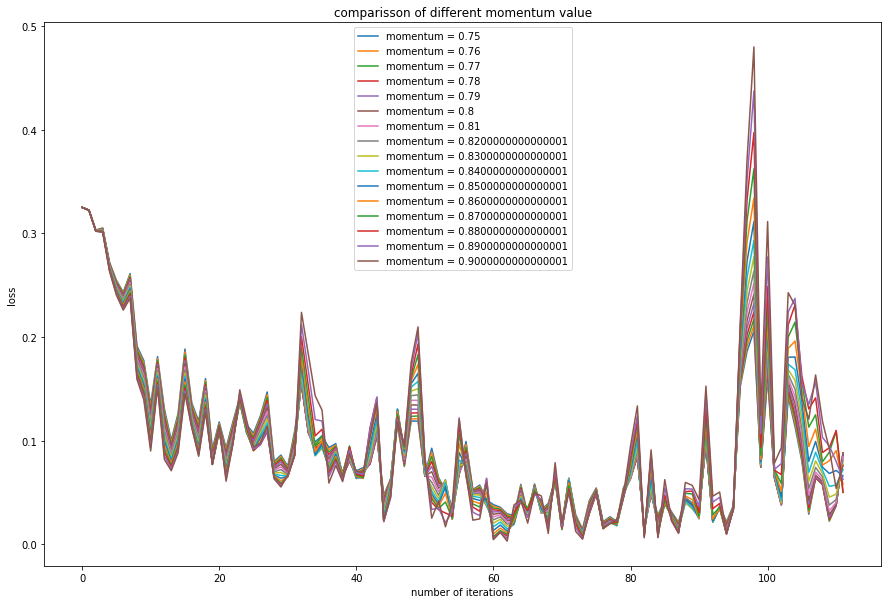

In [53]:
l = np.arange(0.75, 0.9, 0.01)
plt.figure(figsize=(15,10))
for kek in l:
    plt.plot(train(X, y, tf.train.MomentumOptimizer(0.01, kek).minimize(loss)), label = 'momentum = ' + str(kek))
    print('momentum = ' + str(kek) + ', loss = ' + str(train(X, y, tf.train.MomentumOptimizer(0.01, kek).minimize(loss))[-1]))
plt.legend()
plt.title('comparisson of different momentum value')
plt.ylabel('loss')
plt.xlabel('number of iterations')


Вывод: лучшим значением `momentum` является 0.88, так как на графике можно заметить, что на послених итерацициях `loss` уменьшается, в отличии от других значений

### **Задание 2.2** (0.5 баллa) 
Исследуйте вклад `learning_rate`. Для этого для разных значений `learning_rate` постройте графики значения функции потерь от номера итерации. При каких значениях длины шага градиентного спуска алгоритм сходится быстрее? Используйте параметр метод MomentumOptimizer с параметром, который вы считаете лучшим по итогам предыдущего задания.

l_rate = 0.001, loss = 0.10183982
l_rate = 0.007, loss = 0.0568681
l_rate = 0.01, loss = 0.050111614
l_rate = 0.05, loss = 0.62502086
l_rate = 0.1, loss = 1.8315223
l_rate = 0.15, loss = 1.4103334
l_rate = 0.2, loss = 3.178616
l_rate = 0.25, loss = 3.223619
l_rate = 0.4, loss = 3.223619
l_rate = 0.5, loss = 3.223619


Text(0.5, 0, 'number of iterations')

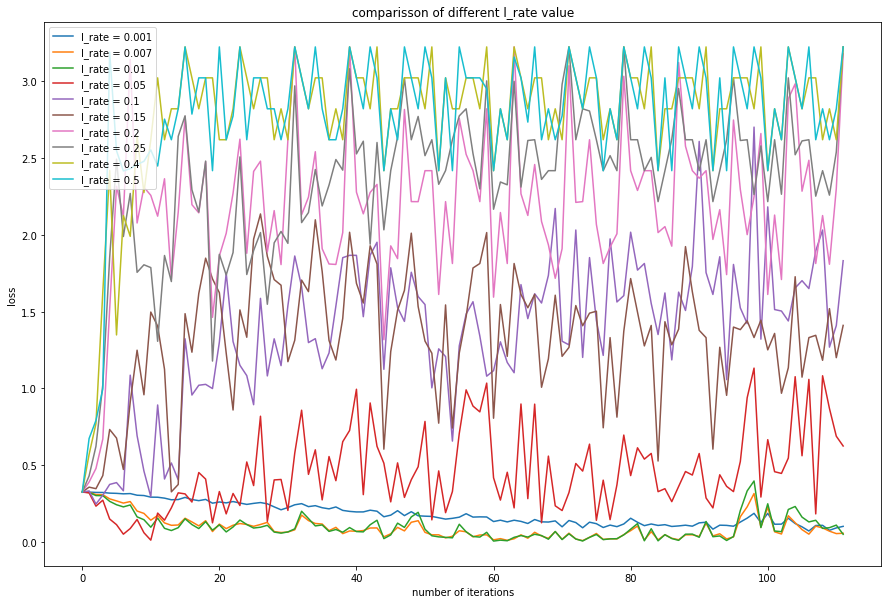

In [54]:
l = [0.001, 0.007, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.4, 0.5]
plt.figure(figsize=(15,10))
for kek in l:
    plt.plot(train(X, y, tf.train.MomentumOptimizer(kek, 0.88).minimize(loss)), label = 'l_rate = ' + str(kek))
    print('l_rate = ' + str(kek) + ', loss = ' + str(train(X, y, tf.train.MomentumOptimizer(kek, 0.88).minimize(loss))[-1]))
plt.legend()
plt.title('comparisson of different l_rate value')
plt.ylabel('loss')
plt.xlabel('number of iterations')

Рассмотрим значения на интервале [ 0.01 : 0.1 )


l_rate = 0.001, loss = 0.10628091
l_rate = 0.002, loss = 0.08932179
l_rate = 0.003, loss = 0.09419979
l_rate = 0.004, loss = 0.09515838
l_rate = 0.005, loss = 0.085691765
l_rate = 0.006, loss = 0.07017461
l_rate = 0.007, loss = 0.057423703
l_rate = 0.008, loss = 0.050821025
l_rate = 0.009000000000000001, loss = 0.049007114


Text(0.5, 0, 'number of iterations')

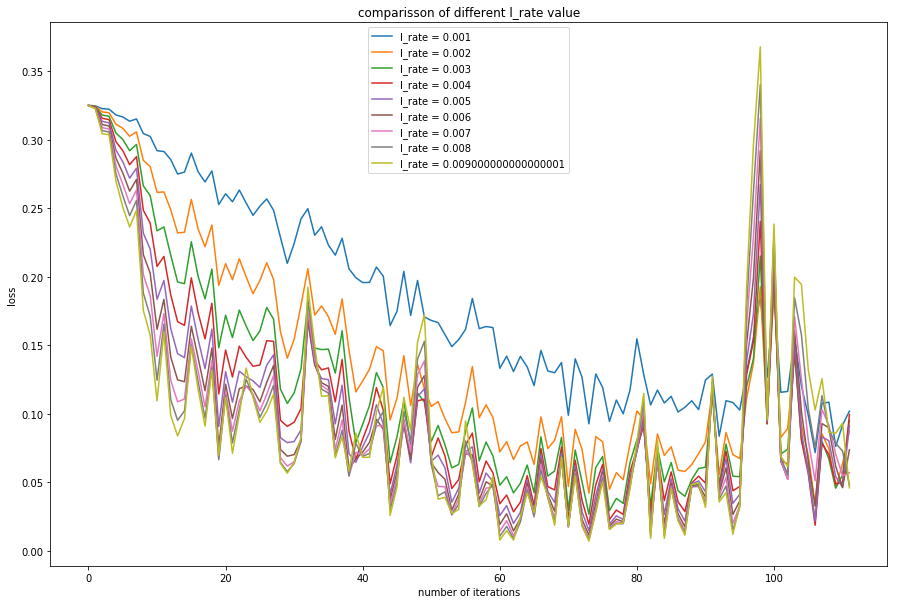

In [55]:
l = np.arange(0.001, 0.01, 0.001)
plt.figure(figsize=(15,10))
for kek in l:
    plt.plot(train(X, y, tf.train.MomentumOptimizer(kek, 0.88).minimize(loss)), label = 'l_rate = ' + str(kek))
    print('l_rate = ' + str(kek) + ', loss = ' + str(train(X, y, tf.train.MomentumOptimizer(kek, 0.87).minimize(loss))[-1]))
plt.legend()
plt.title('comparisson of different l_rate value')
plt.ylabel('loss')
plt.xlabel('number of iterations')

Вывод: лучше всего себя показал `learning_rate` равный 0.009

**Задание 2.3** (0.5 балла) Проделайте то же, что и в пункте выше, но используйте в качестве базового алгоритма оптимизации `Adam` с дефолтными параметрами.

l_rate = 0.0007, loss = 0.081790574
l_rate = 0.001, loss = 0.07183969
l_rate = 0.007, loss = 0.09019765
l_rate = 0.01, loss = 0.07374529
l_rate = 0.05, loss = 2.52451
l_rate = 0.1, loss = 1.039203
l_rate = 0.15, loss = 1.8132856
l_rate = 0.2, loss = 1.5696456
l_rate = 0.25, loss = 2.6191907
l_rate = 0.4, loss = 2.9568648
l_rate = 0.5, loss = 3.223619


Text(0.5, 0, 'number of iterations')

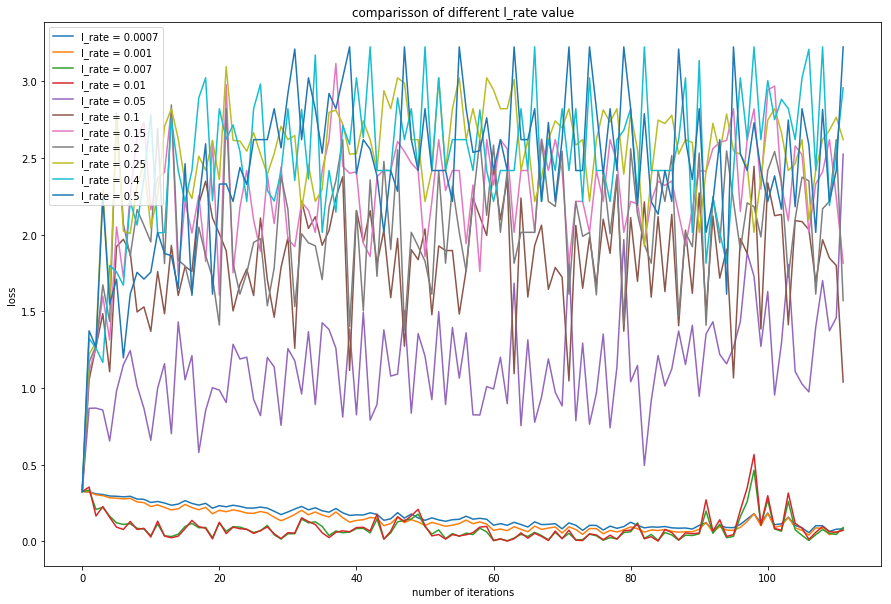

In [56]:
l = [0.0007, 0.001, 0.007, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.4, 0.5]
plt.figure(figsize=(15,10))
for kek in l:
    plt.plot(train(X, y, tf.train.AdamOptimizer(learning_rate = kek).minimize(loss)), label = 'l_rate = ' + str(kek))
    print('l_rate = ' + str(kek) + ', loss = ' + str(train(X, y, tf.train.AdamOptimizer(learning_rate = kek).minimize(loss))[-1]))
plt.legend()
plt.title('comparisson of different l_rate value')
plt.ylabel('loss')
plt.xlabel('number of iterations')

Вывод: для оптимизации больше подходит `l_rate = 0.001`

**Задание 2.4** (0.5 балла) Сравните алгоритмы `Adam` и `Momentum` для данной задачи. Какой показывает себя лучше?

Text(0.5, 0, 'number of iterations')

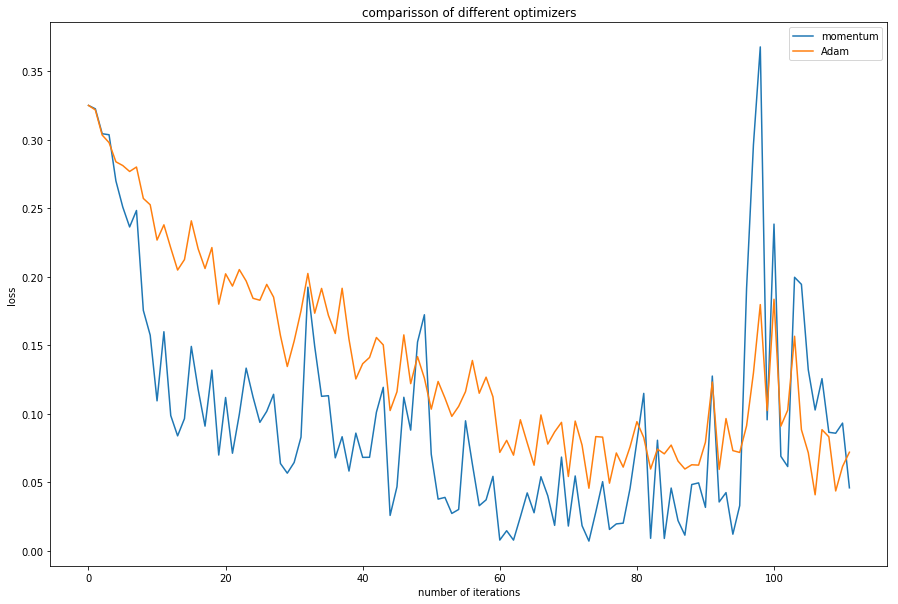

In [57]:
plt.figure(figsize=(15,10))
plt.plot(train(X, y, tf.train.MomentumOptimizer(0.009, 0.88).minimize(loss)), label = 'momentum')
plt.plot(train(X, y, tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)), label = 'Adam')
plt.legend()
plt.title('comparisson of different optimizers')
plt.ylabel('loss')
plt.xlabel('number of iterations')

Вывод: практически при всех итерациях лосс моментума был ниже, в конце ситуация не изменилась. Вердикт: моментум лучше

## Задание 3 -- наша первая нейросеть, часть 2 (4 балла).

В этом задании мы напишем нейросеть для работы с датасетом MNIST размера 28х28. Исользовать можно только полносвязные (dense) слои! Для этого мы "вытянем" картинки 28х28 в длинный вектор размера 784.

Это вставка кода из файла mnist, так как его сложно было скачать)

In [0]:
import sys
import os
import time

import numpy as np

__doc__="""taken from https://github.com/Lasagne/Lasagne/blob/master/examples/mnist.py"""

def load_dataset():
    # We first define a download function, supporting both Python 2 and 3.
    if sys.version_info[0] == 2:
        from urllib import urlretrieve
    else:
        from urllib.request import urlretrieve

    def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
        print("Downloading %s" % filename)
        urlretrieve(source + filename, filename)

    # We then define functions for loading MNIST images and labels.
    # For convenience, they also download the requested files if needed.
    import gzip

    def load_mnist_images(filename):
        if not os.path.exists(filename):
            download(filename)
        # Read the inputs in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
        # The inputs are vectors now, we reshape them to monochrome 2D images,
        # following the shape convention: (examples, channels, rows, columns)
        data = data.reshape(-1, 1, 28, 28)
        # The inputs come as bytes, we convert them to float32 in range [0,1].
        # (Actually to range [0, 255/256], for compatibility to the version
        # provided at http://deeplearning.net/data/mnist/mnist.pkl.gz.)
        return (data / np.float32(256)).squeeze()

    def load_mnist_labels(filename):
        if not os.path.exists(filename):
            download(filename)
        # Read the labels in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=8)
        # The labels are vectors of integers now, that's exactly what we want.
        return data

    # We can now download and read the training and test set images and labels.
    X_train = load_mnist_images('train-images-idx3-ubyte.gz')
    y_train = load_mnist_labels('train-labels-idx1-ubyte.gz')
    X_test = load_mnist_images('t10k-images-idx3-ubyte.gz')
    y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

    # We reserve the last 10000 training examples for validation.
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]

    # We just return all the arrays in order, as expected in main().
    # (It doesn't matter how we do this as long as we can read them again.)
    return X_train, y_train, X_val, y_val, X_test, y_test

In [0]:
X_train, y_train, X_test, y_test, _, _ = load_dataset()

X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

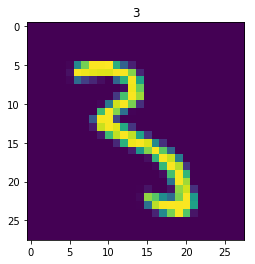

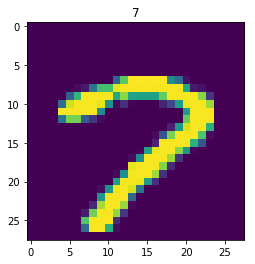

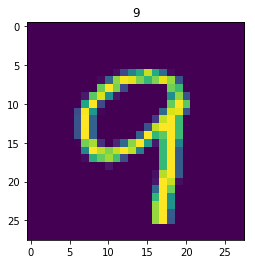

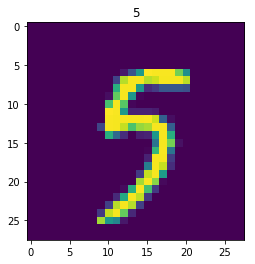

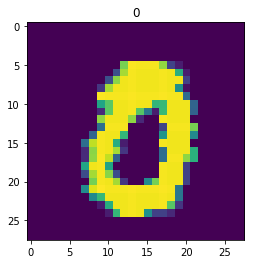

In [60]:
for i in [228, 1437, 322, 420, 69]:
    plt.title(y_train[i])
    plt.imshow(X_train[i].reshape((28, 28)))
    plt.show()

Подберите архитектуру и алгоритм оптимизации так, чтобы значение accuracy на тестовой выборке было не менее 97.5.

In [64]:
from sklearn.metrics import accuracy_score
tf.reset_default_graph()

def train_and_validate(X_train, y_train, X_test, y_test, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X_train) // batch_size
        n_batch_test = len(X_test) // batch_size
        for epoch in range(5):
            loss_history_train = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X_train[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_train[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_train.append(loss_)

        for epoch in range(1):
            loss_history_test = []
            prediction_history = []
            for b in range(n_batch_test):
                loss_, predicted_ = sess.run([loss, predicted], feed_dict={X_input: X_test[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_test[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_test.append(loss_)
                prediction_history += predicted_.argmax(-1).tolist()
            print("Test accuracy: ", accuracy_score(y_test, prediction_history)
    return loss_history_train, loss_history_test

X_input = tf.placeholder("float32", (None, 784)) # dim = [batch_size, 784]
y_input = tf.placeholder("int32", (None, )) # dim = [batch_size,]

layer1 = tf.layers.dense(X_input, 300, activation=tf.nn.sigmoid) #<define architecture as a function of X_input
layer2 = tf.layers.dense(layer1, 300, activation=tf.nn.sigmoid)
layer3 = tf.layers.dense(layer2, 300, activation=tf.nn.sigmoid)
predicted = tf.layers.dense(layer3, 10)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_input, logits=predicted))
loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits=predicted, labels=tf.one_hot(y_input, depth=10)) # <define log loss with one-hot vector of labels
train_op = tf.train.AdamOptimizer(0.0008).minimize(loss)

loss_history_train, loss_history_test = train_and_validate(X_train, y_train, X_test, y_test, train_op)

Test accuracy:  0.976


Одна эпоха давала ошибку на уровне 96%, для достижения результата 97.5% пришлось сделать 5 эпох. Зависимость ошибки от колличества слоев и нейронов в каждом слое остается загадкой. Основной эффект давало изменение количества эпох. 

## Задание 4 (0.1 баллов).

**Задание 4.1**. (0.1 баллов) Оставьте ниже смешную картинку (желательно про машинное обучение). Лучшую картинку мы поставим на аватарку чатика "Флуд про ИАД".

**Задание 4.2**. Напищите ниже фидбек по заданию и по курсу в целом. 

Фидбек:
На семинарах данный тип заданий не проходилb. Не было объяснений насчет количества слоев и количества нейронов. Для решения этого задания пришлось кучу 